In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\StJames_hab.rds')

In [3]:
df = result[None]
df['Habitat'].value_counts()
# 1) PFO (Palustrine Forested)
# 2) Non-wetland Open
# 3) PSS (Palustrine scrub-shrub)

1.0    42
3.0    38
2.0    28
Name: Habitat, dtype: int64

In [4]:
df['Wetland'] = np.where(df['Habitat']==2.0, 0, 1)
df

,Habitat,DEM,sDEM,hDEM,DSM,CHM,Aspect,Slope,Curvature,PlanCurv,ProfileCurv,NDVI,NDRE,NDWI,x,y,Wetland
0,1.0,18.596609,18.622410,18.596609,18.596609,0.000000,220.204926,0.282718,-7.620917,-7.436076,0.184842,0.740069,0.126273,-0.581894,689081.606492,23141.985899,1
1,1.0,18.852713,18.852713,18.852713,18.852713,0.000000,152.799408,1.943434,0.002119,0.001246,-0.000874,0.584242,0.125773,-0.588223,689061.811650,23140.486293,1
2,3.0,20.939791,21.091728,20.939791,23.523529,2.648577,337.529266,5.929980,-0.000000,-0.000000,0.000000,0.825232,0.204998,-0.667627,689063.611181,23114.393152,1
3,1.0,18.763475,18.600845,18.763475,20.473263,1.321201,262.127075,15.249783,0.004239,0.002263,-0.001976,0.459699,0.169193,-0.545694,689045.315949,23112.593625,1
4,1.0,18.332489,18.293556,18.379988,18.949297,0.000000,256.520172,15.954921,-13.741387,-3.217997,10.523391,0.631705,0.108272,-0.529282,689044.116261,23110.494177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2.0,16.185696,16.108330,16.319582,16.185696,0.000000,187.272522,1.815900,49.468147,20.895496,-28.572649,0.473911,0.121286,-0.534078,689054.313604,22178.939065,0
104,3.0,16.280769,15.979391,16.427000,18.946585,4.668274,143.560349,7.051764,152.568817,166.965775,14.396961,0.844496,0.263951,-0.678592,689005.726264,22136.350260,1
105,2.0,16.497171,16.600376,16.497171,16.496794,-0.000378,240.189713,7.700943,54.963428,13.395777,-41.567654,0.572507,0.131399,-0.559735,689130.793676,22133.051128,0
106,2.0,16.704000,16.905821,16.704000,16.704000,0.000000,330.354675,2.663709,-18.840366,25.873678,44.714043,0.175782,0.095512,-0.173850,689158.386486,22114.755937,0


<AxesSubplot:>

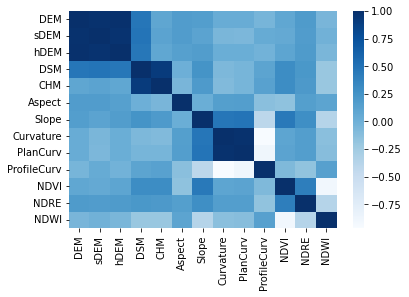

In [5]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [6]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
NDWI,-0.392657
Aspect,-0.092753
ProfileCurv,-0.063555
Curvature,0.081846
PlanCurv,0.092639
sDEM,0.250377
DEM,0.268910
NDRE,0.272870
hDEM,0.288351
CHM,0.357216


In [7]:
df.to_csv("./StJames_hab.csv")